In [7]:
# imports and dependencies, api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

In [8]:
# import gmaps API key for heat map
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [9]:
# file to load
path = "./Accident_Info.csv"

In [10]:
# initial data read for San Francisco
data = pd.read_csv( path )

In [11]:
# Clean data of duplicates and missing values, rename columns
df = pd.DataFrame( data )

In [12]:
# formatting of data, NaN handling
df = df[["Accident_Index", "Accident_Severity",
         "Date", "Day_of_Week",
         "Junction_Control", "Junction_Detail",
         "Latitude", "Longitude", "Light_Conditions",
         "Road_Surface_Conditions", "Speed_limit",
         "Time", "Urban_or_Rural_Area",
         "Weather_Conditions", "Year"]]
df = df.rename(index=str, columns={"Accident_Index": "Accident",
                                   "Accident_Severity": "Severity",
                                   "Day_of_Week": "Day",
                                   "Junction_Control": "Traffic Control",
                                   "Junction_Detail": "Junction Type",
                                   "Light_Conditions": "Light",
                                   "Road_Surface_Conditions": "Road Cond.",
                                   "Speed_limit": "Speed Limit",
                                   "Urban_or_Rural_Area": "City Type",
                                   "Weather_Conditions": "Weather"})
df = df.set_index( "Accident" )

In [13]:
# preview of data
df.head()

,Severity,Date,Day,Traffic Control,Junction Type,Latitude,Longitude,Light,Road Cond.,Speed Limit,Time,City Type,Weather,Year
Accident,,,,,,,,,,,,,,
200501BS00001,Serious,1/4/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,-0.191170,Daylight,Wet or damp,30,17:42,Urban,Raining no high winds,2005
200501BS00002,Slight,1/5/2005,Wednesday,Auto traffic signal,Crossroads,51.520075,-0.211708,Darkness - lights lit,Dry,30,17:36,Urban,Fine no high winds,2005
200501BS00003,Slight,1/6/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,-0.206458,Darkness - lights lit,Dry,30,0:15,Urban,Fine no high winds,2005
200501BS00004,Slight,1/7/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,-0.173862,Daylight,Dry,30,10:35,Urban,Fine no high winds,2005
200501BS00005,Slight,1/10/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,-0.156618,Darkness - lighting unknown,Wet or damp,30,21:13,Urban,Fine no high winds,2005


## Subject Headline

### Subject focus

trend1 description / question / prompt

In [14]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )

In [15]:
# re-format/style data for trend1

In [16]:
# manipulate data
# setup analysis

In [17]:
# preview of data

In [18]:
# visualization of data
# consider the best visualization for what you want to show

In [19]:
# free space

trend2 description / question / prompt

In [20]:
# re-format/style data for trend2

In [21]:
# manipulate data
# setup analysis

In [22]:
# preview of data

In [23]:
# visualization of data
# consider the best visualization for what you want to show

In [24]:
# free space

trend3 description / question / prompt

In [25]:
# re-format/style data for trend3

In [26]:
# manipulate data
# setup analysis

In [27]:
# preview of data

In [28]:
# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?

## Subject Headline

### Subject focus

trend1 description / question / prompt

In [29]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )

In [30]:
# re-format/style data for trend1

In [31]:
# manipulate data
# setup analysis

In [32]:
# preview of data

In [33]:
# visualization of data
# consider the best visualization for what you want to show

In [34]:
# free space

trend2 description / question / prompt

In [35]:
# re-format/style data for trend2

In [36]:
# manipulate data
# setup analysis

In [37]:
# preview of data

In [38]:
# visualization of data
# consider the best visualization for what you want to show

In [39]:
# free space

trend3 description / question / prompt

In [40]:
# re-format/style data for trend3

In [41]:
# manipulate data
# setup analysis

In [42]:
# preview of data

In [43]:
# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?

#  Traffic Control Method, Road Conditions, and Speed Limit v Severity

## Trafffic Control Methods

trend1 description / question / prompt

In [44]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )

In [110]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
severity_df = df.groupby(["Severity","Traffic Control"]).size()
severity_df

Severity  Traffic Control             
Fatal     Authorised person                   3
          Auto traffic signal               218
          Data missing or out of range      434
          Give way or uncontrolled          474
          Stop sign                           2
Serious   Authorised person                  25
          Auto traffic signal              3638
          Data missing or out of range     5572
          Give way or uncontrolled         9086
          Stop sign                          44
Slight    Authorised person                 144
          Auto traffic signal             24432
          Data missing or out of range    34315
          Give way or uncontrolled        66614
          Stop sign                         221
dtype: int64

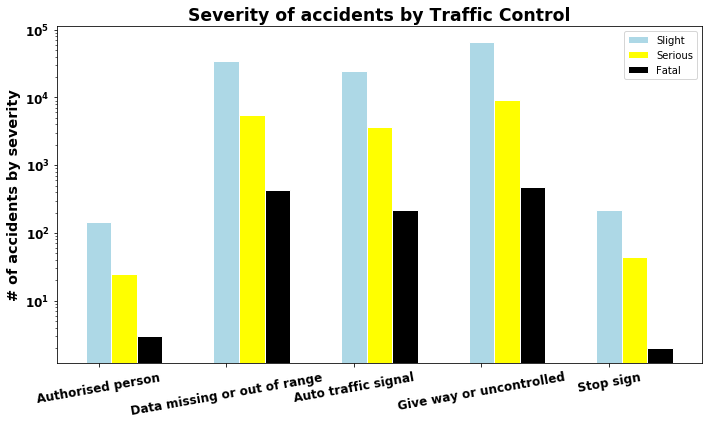

In [109]:
fatal = []
serious = []
slight = []
listofcontrols = ["Authorised person", "Data missing or out of range", "Auto traffic signal", "Give way or uncontrolled", "Stop sign", ]
for control in listofcontrols:
    fatal.append(severity_df['Fatal'][control])
    serious.append(severity_df['Serious'][control])
    slight.append(severity_df['Slight'][control])
    
fatal_begin = np.add(slight, serious).tolist()

bar_width = .2

fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(listofcontrols))])

ax.bar(idx,slight, color="lightblue", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width, serious,color="yellow", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width*2, fatal, color="black", edgecolor = "white", width=bar_width)

ax.set_xticks(idx)
ax.set_xticklabels(listofcontrols, fontweight='bold', fontsize='large', rotation=10)
for tick in ax.get_yticklabels():
    tick.set_fontsize("large")
    tick.set_fontweight("bold")
    
ax.set_yscale('log')    
ax.set_ylabel("# of accidents by severity", fontweight='bold', fontsize='x-large')
ax.legend(['Slight', 'Serious', 'Fatal'])
ax.set_title("Severity of accidents by Traffic Control", fontweight='bold', fontsize='xx-large')


fig.tight_layout()

plt.show()

## Road Conditions

In [112]:
# re-format/style data for trend2
severity_df = df.groupby(["Severity","Road Cond."]).size()

severity_df

Severity  Road Cond.                  
Fatal     Dry                                892
          Frost or ice                        10
          Wet or damp                        229
Serious   Dry                              14734
          Flood over 3cm. deep                 6
          Frost or ice                       147
          Snow                                42
          Wet or damp                       3436
Slight    Data missing or out of range         4
          Dry                             101008
          Flood over 3cm. deep                39
          Frost or ice                      1069
          Snow                               438
          Wet or damp                      23168
dtype: int64

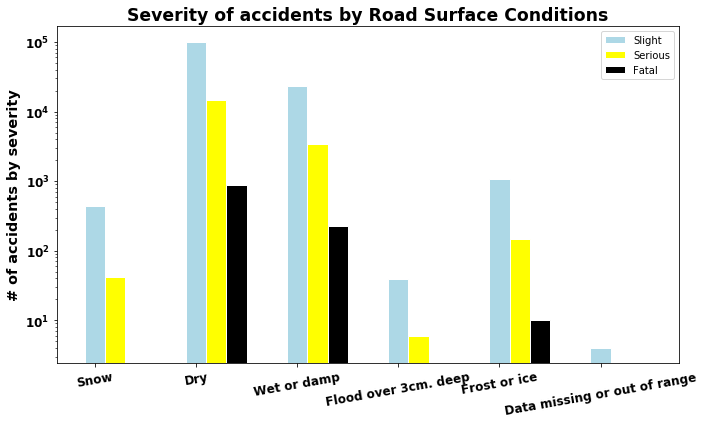

In [105]:
fatal = []
serious = []
slight = []
listofRoadConds = ["Snow", "Dry", "Wet or damp", "Flood over 3cm. deep", "Frost or ice", "Data missing or out of range"]
for cond in listofRoadConds:
    if cond in severity_df['Fatal']:
        fatal.append(severity_df['Fatal'][cond])
    else:
        fatal.append(0)
    if cond in severity_df['Serious']:
        serious.append(severity_df['Serious'][cond])
    else:
        serious.append(0)
    if cond in severity_df['Slight']:
        slight.append(severity_df['Slight'][cond])
    else:
        slight.append(0)
    
#fatal_begin = np.add(slight, serious).tolist()

bar_width = .2
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(listofRoadConds))])

ax.bar(idx, slight, color="lightblue", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width, serious, color="yellow", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width*2, fatal, color="black", edgecolor="white", width=bar_width)

ax.set_xticks(idx)
ax.set_xticklabels(listofRoadConds, fontweight='bold', fontsize='large',rotation=10)
for tick in ax.get_yticklabels():
    tick.set_fontsize("large")
    tick.set_fontweight("bold")

ax.set_yscale('log') 
ax.set_ylabel("# of accidents by severity", fontweight='bold', fontsize='x-large')
ax.legend(['Slight', 'Serious', 'Fatal'])
ax.set_title("Severity of accidents by Road Surface Conditions", fontweight='bold', fontsize='xx-large')

fig.tight_layout()

plt.show()

## Speed Limit

trend3 description / question / prompt

In [116]:
# re-format/style data for trend3
severity_df = df.groupby(["Severity","Speed Limit"]).size()

severity_df

Severity  Speed Limit
Fatal     20                  5
          30                948
          40                 95
          50                 51
          60                  6
          70                 26
Serious   20                 44
          30              17093
          40                574
          50                466
          60                 37
          70                151
Slight    10                  1
          15                  2
          20                240
          30             117627
          40               3529
          50               3044
          60                163
          70               1120
dtype: int64

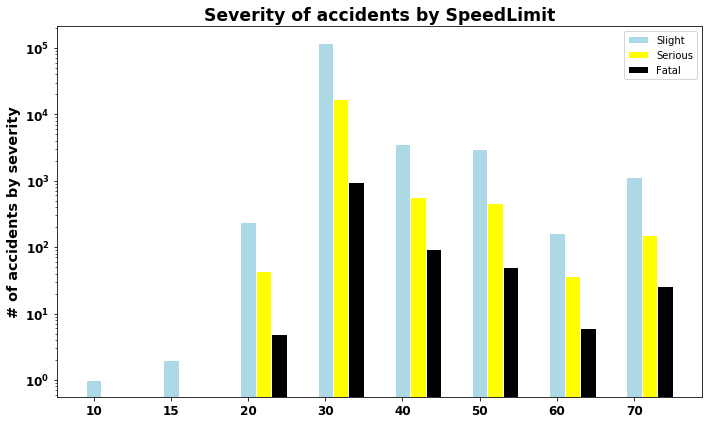

In [115]:
fatal = []
serious = []
slight = []
listofSpeedLimit = [10,15,20,30,40,50,60,70]

for SpeedLimit in listofSpeedLimit:
    if SpeedLimit in severity_df['Fatal']:
        fatal.append(severity_df['Fatal'][SpeedLimit])
    else:
        fatal.append(0)
    if SpeedLimit in severity_df['Serious']:
        serious.append(severity_df['Serious'][SpeedLimit])
    else:
        serious.append(0)
    if SpeedLimit in severity_df['Slight']:
        slight.append(severity_df['Slight'][SpeedLimit])
    else:
        slight.append(0)
    
fatal_begin = np.add(slight, serious).tolist()

bar_width = .2
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(listofSpeedLimit))])

ax.bar(idx, slight, color="lightblue", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width, serious, color="yellow", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width*2, fatal, color="black", edgecolor="white", width=bar_width)

ax.set_xticks(idx)
ax.set_xticklabels(listofSpeedLimit, fontweight='bold', fontsize='large')
for tick in ax.get_yticklabels():
    tick.set_fontsize("large")
    tick.set_fontweight("bold")

ax.set_yscale('log')     
ax.set_ylabel("# of accidents by severity", fontweight='bold', fontsize='x-large')
ax.legend(['Slight', 'Serious', 'Fatal'])
ax.set_title("Severity of accidents by SpeedLimit", fontweight='bold', fontsize='xx-large')

fig.tight_layout()

plt.show()
    

In [ ]:
# manipulate data
# setup analysis

In [ ]:
# preview of data

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?